# Линейная алгебра. Лабораторная работа 1, осень 2024



В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [657]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [658]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`.

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;  
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;  
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.2 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [659]:
# Your code here
z = np.zeros([3, 4])
z

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [660]:
d = np.diag([1,2,3,4,5])
d

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [661]:
np.trace(d)

np.int64(15)

In [662]:
sla.inv(d)

array([[ 1.        , -0.        , -0.        , -0.        , -0.        ],
       [ 0.        ,  0.5       , -0.        , -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.33333333, -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.25      , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.2       ]])

In [663]:
x = np.random.rand(4, 5)
x

array([[0.43493999, 0.55531524, 0.4408362 , 0.97156111, 0.85104833],
       [0.03161217, 0.54313935, 0.55073332, 0.21575827, 0.39694465],
       [0.00244371, 0.41542007, 0.13618231, 0.58747165, 0.9999948 ],
       [0.95705674, 0.17081616, 0.10828703, 0.54330106, 0.50557471]])

In [664]:
sla.det(x[2:4, 1:3])


np.float64(0.021722465975526975)

In [665]:
x.T@x

array([[1.10613569, 0.42319454, 0.31311679, 0.95079691, 0.86901061],
       [0.42319454, 0.80512736, 0.61899804, 0.99356161, 1.18997461],
       [0.31311679, 0.61899804, 0.52791545, 0.68596028, 0.78471234],
       [0.95079691, 0.99356161, 0.68596028, 1.6307816 , 1.77463742],
       [0.86901061, 1.18997461, 0.78471234, 1.77463742, 2.13744371]])

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [1 балл]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [666]:
def my_det(x):
    '''
    Parameters
    ----------
    X : array_like

    Returns
    -------
    det : float
        Determinant of `a`.
    '''

    # Your code here
    if x.shape[0]!=x.shape[1]:
        raise ValueError
    det = 1.
    x = x.astype(float)
    n = x.shape[0]
    for i in range(n):
        ind = np.argmax(np.abs(x[i:n, i])) + i
        if x[ind, i] == 0:
            return 0
        if i != ind:
            x[[i, ind]] = x[[ind, i]]
            det *= -1
        for k in range(i+1, n):
            x[k, :] -= x[i, :]*(x[k, i]/x[i, i])
    for i in range(n):
        det *= x[i, i]

    return det

Простая проверка:

In [667]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(my_det(X))

-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [668]:
# Запустите этот блок кода
for _ in range(50):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')
        print(X)
        print(my_det(X))
        print(sla.det(X))

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

3.89 μs ± 31.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
84.9 μs ± 1.32 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
41.6 μs ± 1.35 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
6.07 ms ± 56.5 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.46 ms ± 321 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


/var/folders/1g/dbz0vmls7b3408g90fsggdqr0000gn/T/ipykernel_44145/4176112179.py:29: RuntimeWarning: overflow encountered in scalar multiply
  det *= x[i, i]


799 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


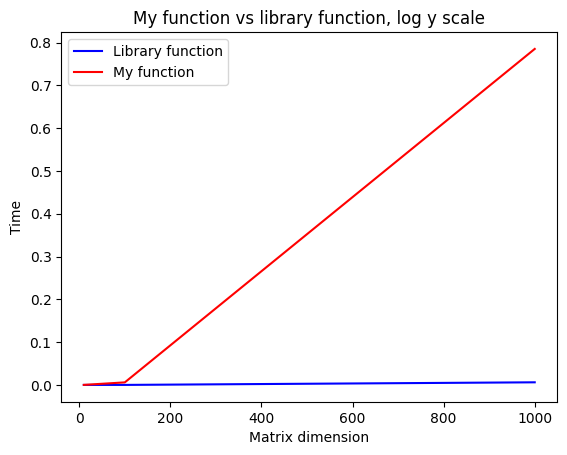

In [669]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

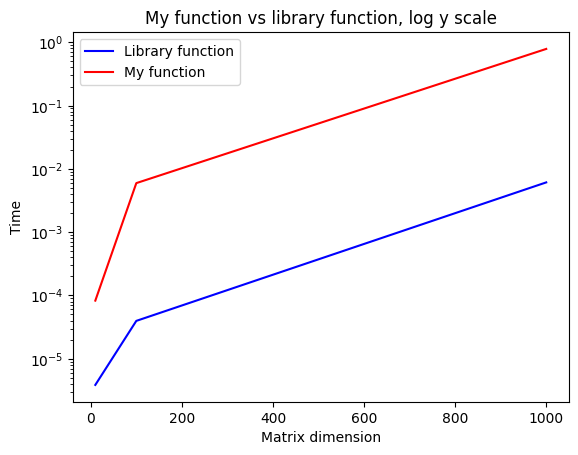

In [670]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью.

**Задание 3.1 [0.6 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [671]:
# Your code here
A = np.array([
    [1, 0],
    [10**20, 1]
])
B = np.array([
    [10**(-20), 1],
    [0, 1-10**20]
])
print(A@B)
A = np.array([
    [1., 0.],
    [10.**20, 1.]
])
B = np.array([
    [10.**(-20), 1.],
    [0., 1.-10.**20]
])
print(A@B)

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Напишите здесь свой ответ** Первый результат правильный (если перемножить матрицы руками, то получим как раз его). Во втором результате возникает ошибка из-за неточности вычислений с типом float

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [672]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim)).astype(int)
    
    # Your code here
    for j in range(dim):
        P[0, j] = 1
    for i in range(dim):
        P[i, 0] = 1
    # P_ij = P_i(j-1) + P_(i-1)j
    for i in range(1, dim):
        for j in range(1, dim):
            P[i, j] = P[i, j - 1] + P[i - 1, j]

    return P



Чему равен её определитель? **Строго** поясните свой ответ.

----
**Ваше решение** Заметим, что $C_{n}^k=C_{n-1}^k+C_{n-1}^{k-1}$

Докажем индукцией по числу строк в матрице, что определитель равен 1. База для $n=1;2$ очевидна. Переход: пусть утверждение верно для $n$, докажем для $n+1$. Из матрицы $Q$ размера $n+1$ вычтем из каждой строки, кроме первой, предыдущую строку. Получится матрица $A$: $a_{ij}=P_{ij}-P_{(i-1)j}=P_{i(j-1)}$, если $i \geq 1, j \geq 1$; $a_{ij}=0$, если $i \geq 1, j=0$; $a_{ij}=P_{ij}$, если $i=0$. Теперь из матрицы A вычтем из каждого столбца, кроме первого, предыдущий столбец. Получится матрица $B$: $b_{ij}=a_{ij}-a_{i(j-1)}=a_{(i-1)j}=P_{(i-1)(j-1)}$, если $i\geq 1, j\geq 1$; $b_{ij}=0$, если $i=0, j\geq 1$ или $i\geq 1, j=0$; $b_{ij}=1$, если $i=0, j=0$. Таким образом, получилась блочная матрица матрица вида $
\begin{pmatrix}
1 & 0\\
0 & P
\end{pmatrix}
$, где $P$ - матрица Паскаля размера $n$ с определителем 1 по предположению индукции. Тогда $det(Q)=det(A)=det(B)=det(1)\cdot det(P)=1$ 

Ниже привел пример преобразований для $n=5$, чтобы было понятнее

In [673]:
n = 5
p = my_pascal(n)
print(p)
x = my_pascal(6)

print(x)
for i in range(n,0,-1):
    x[i, :] -=x[i-1, :]
print(x)
for i in range(n,0,-1):
    x[:, i] -=x[:, i-1]
print(x)

[[ 1  1  1  1  1]
 [ 1  2  3  4  5]
 [ 1  3  6 10 15]
 [ 1  4 10 20 35]
 [ 1  5 15 35 70]]
[[  1   1   1   1   1   1]
 [  1   2   3   4   5   6]
 [  1   3   6  10  15  21]
 [  1   4  10  20  35  56]
 [  1   5  15  35  70 126]
 [  1   6  21  56 126 252]]
[[  1   1   1   1   1   1]
 [  0   1   2   3   4   5]
 [  0   1   3   6  10  15]
 [  0   1   4  10  20  35]
 [  0   1   5  15  35  70]
 [  0   1   6  21  56 126]]
[[ 1  0  0  0  0  0]
 [ 0  1  1  1  1  1]
 [ 0  1  2  3  4  5]
 [ 0  1  3  6 10 15]
 [ 0  1  4 10 20 35]
 [ 0  1  5 15 35 70]]


А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [674]:
# Your code here
sla.det(my_pascal(30))

np.float64(-3.430165022709843e+45)

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [675]:
# Your code here
def prod_and_sq_sum(A):
    d = np.diag(A)
    return np.prod(d), np.sum(d**2)

prod_and_sq_sum(np.random.rand(5, 5))

(np.float64(0.0030082019909382835), np.float64(0.7267110934392804))

**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [676]:
# Your code here
def f(A, B, lmbd, k):
    n = A.shape[1]
    x = min(k, n)
    A = A[:, :x]
    B = B[:, :x]
    diag_lmbd = np.diag(lmbd[:x])
    return A @ diag_lmbd @ B.T


#тест
def test(A, B, lmbd, k):
    m, n = A.shape
    x = min(k, n)
    sum = np.zeros((m, m)).astype(int)
    for i in range(x):
        sum += lmbd[i]*(A[:, i].reshape((m,1)))@(B[:, i].reshape((1,m)))
    return sum
k = 5
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
B = np.array([
    [7, 8, 9],
    [10, 11, 12]
])
m, n = A.shape
lmbd = np.array([1, 2, 3])
f(A, B, lmbd, k) == test(A, B, lmbd, k)

array([[ True,  True],
       [ True,  True]])

**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком.

In [677]:
# Your code here
def get_diag(A, B):
    diag_elements = np.einsum('ij,ji->i', A, B)
    return diag_elements


def test(A, B):
    return np.diagonal(np.dot(A, B))
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print(get_diag(A, B))
test(A,B)==get_diag(A,B)

[19 50]


array([ True,  True])

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.5 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.5 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.5 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [678]:
def shrink_rotate(x, a, coef=1., angle=0.):
    # Your code here
    return coef * (x - a) * (np.cos(angle) + np.sin(angle)*1j) + a

def shrink_rotate_conj(x, a, coef=1., angle=0.):
    # Your code here
    return shrink_rotate(x, a, coef, angle).conjugate() + 2*a.imag*1j

def geometric_inverse(x, a, r):
    # Your code here
    if x == a:
        raise ValueError('Инверсия не определена')
    return r**2/np.conjugate(x-a) + a


**Задание 5.4 [0.75 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

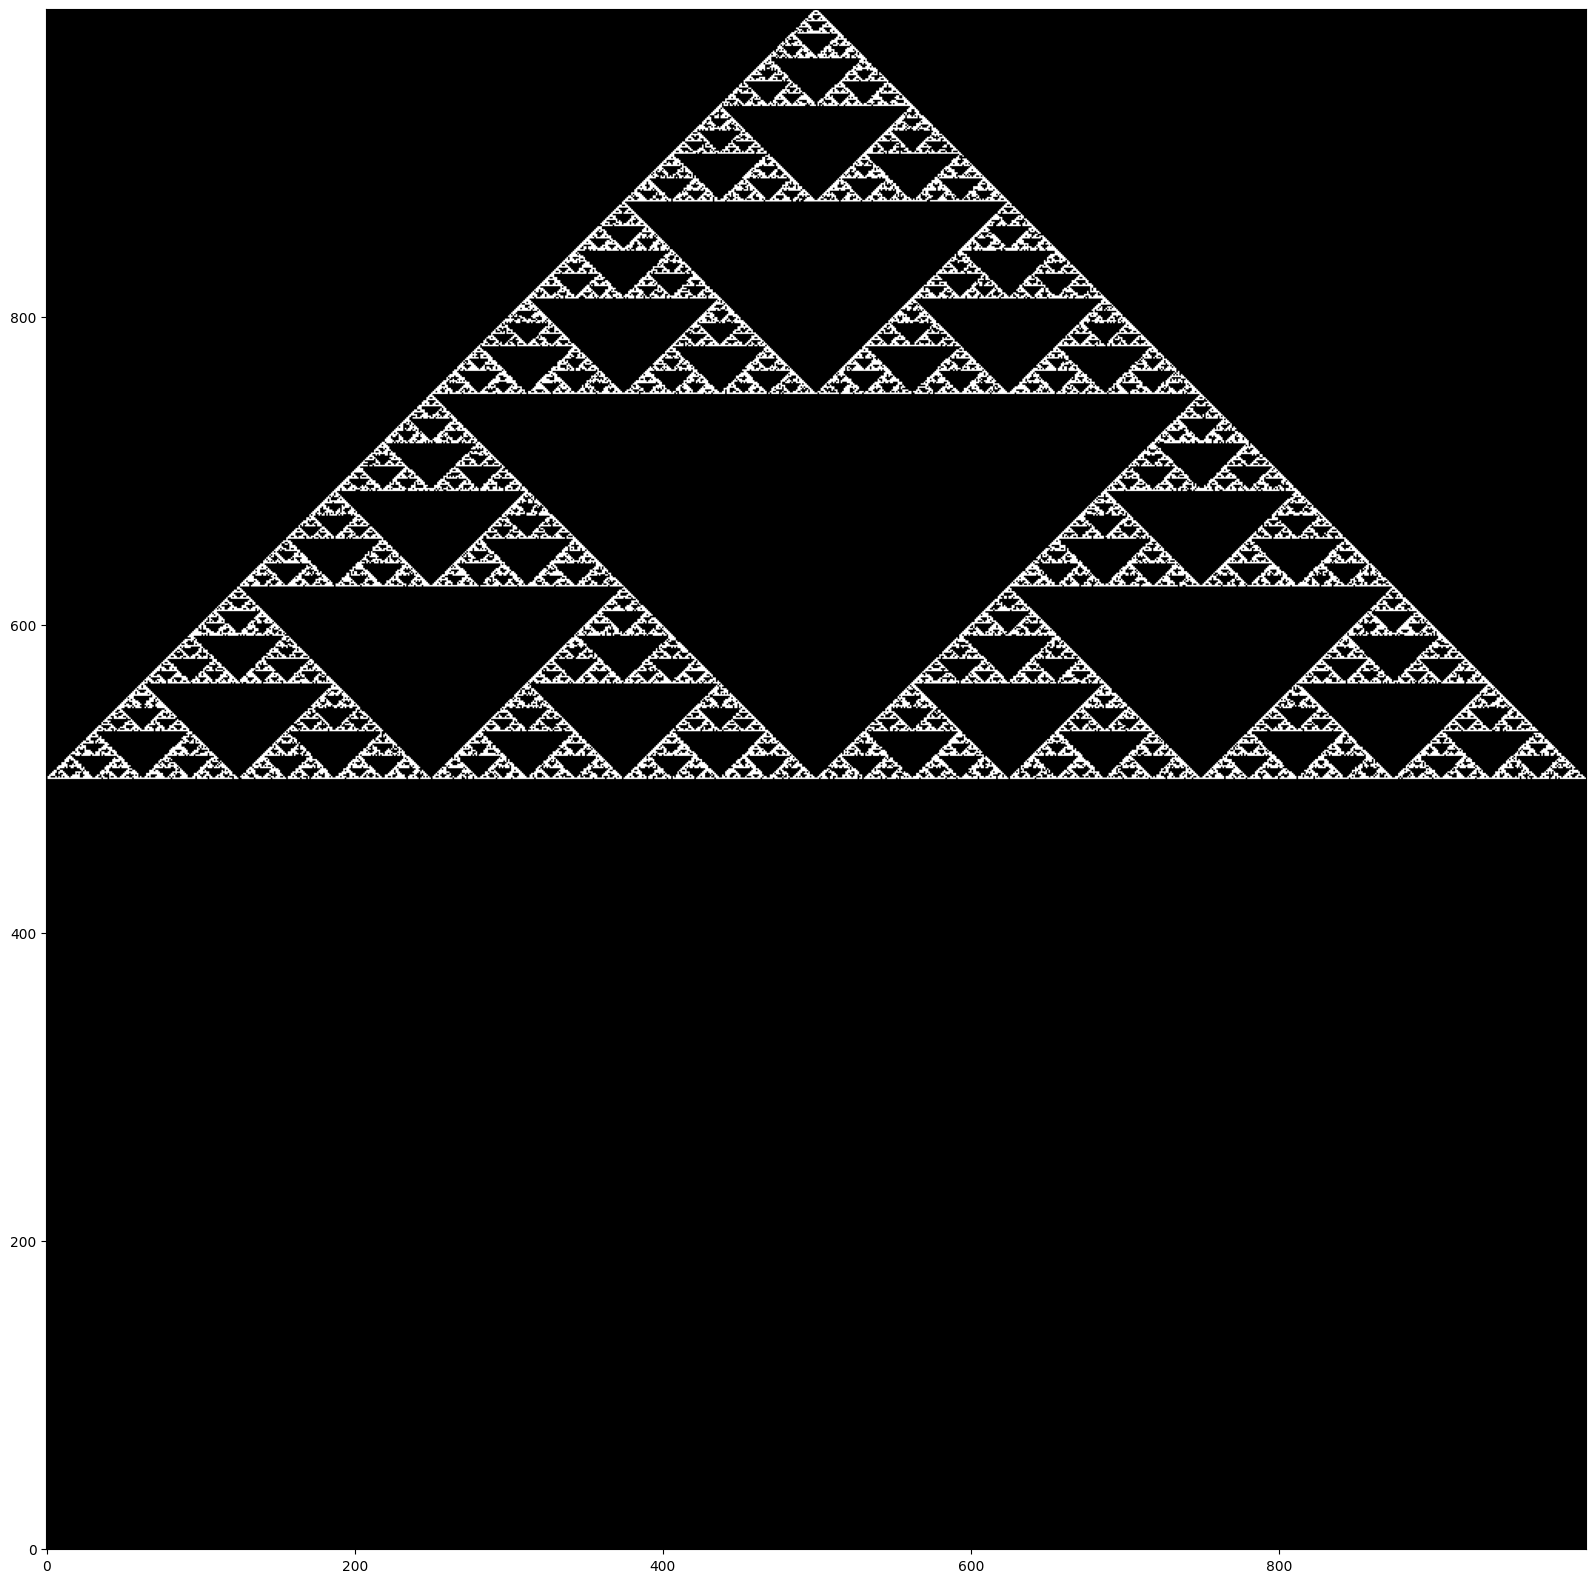

In [680]:
# Your code here
z = 0.5 + 0.*1j
max_iter = 100000
size = 1000
pixels = np.zeros((size, size))

funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    x = int((z.real + 1) * size/2) 
    y = int((z.imag + 1) * size/2)
    if 0 <= x < size and 0 <= y < size:
        if n_iter >= 10: 
            pixels[y, x] = 1 

plt.figure(figsize=(20, 20))
plt.imshow(pixels, cmap='gray')
plt.gca().invert_yaxis()
plt.show()

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

---
Ваше объяснение \
Заметим, что shrink_rotate(t, z, coef=0.5, angle=0.)) возвращает середину отрезка $z+t$, так как $0.5(x-a)+a=\frac{x+a}{2}$. То есть можно считать, что точка t переходит в середину отрезка zt (гомотетия с центром z и коэффициентом 0.5). Это значит, что точка никак не может выйти за границу треугольника, образованного точками $i,\ 1,\ -1$. 
Пусть исходный большой треугольник - $T_0$. Обозначим за $T_{i}$ каждый из трех треугольников, образованных в треугольнике $T_i$ при проведении трех средних линий и содержащих одну из вершин, за $S_i$ -  четвертый, серединный треугольник $T_i$. Докажем по индукции, что мы никогда не попадем внутрь треугольника $S_n$. База верна (мы начинаем с границы, а не изнутри). Переход: Пусть утверждение верно для всех $i\leq n$, докажем для $n+1$. На каждом шаге мы делаем гомотетию с центром в одной из вершин $T_0$ и коэффициентом 0.5. Предположим противное: пусть на каком-то шаге точка попала в один треугольников $S_j$, $j>n$. Рассмотрим положение точки перед этим шагом. Заметим, что тогда она попала в один из треугольников $S_{j-1}$, так гомотетия с центром в одной из вершин $T_1$ и коэффициентом 2 (обратная предыдущей гомотетия) переводит треугольник $T_j$ в какой-то $T_{j-1}$ и $S_j$ в какой-то $S_{j-1}$, то есть точка также попала в $S_{j-1}$. Продолжая аналогично, точка была обязана попасть в треугольники $S_{j-2},\ S_{j-3},...$, то есть рано или поздно она попадет и в $S_1$ - противоречие. Таким образом, утверждение доказано.

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

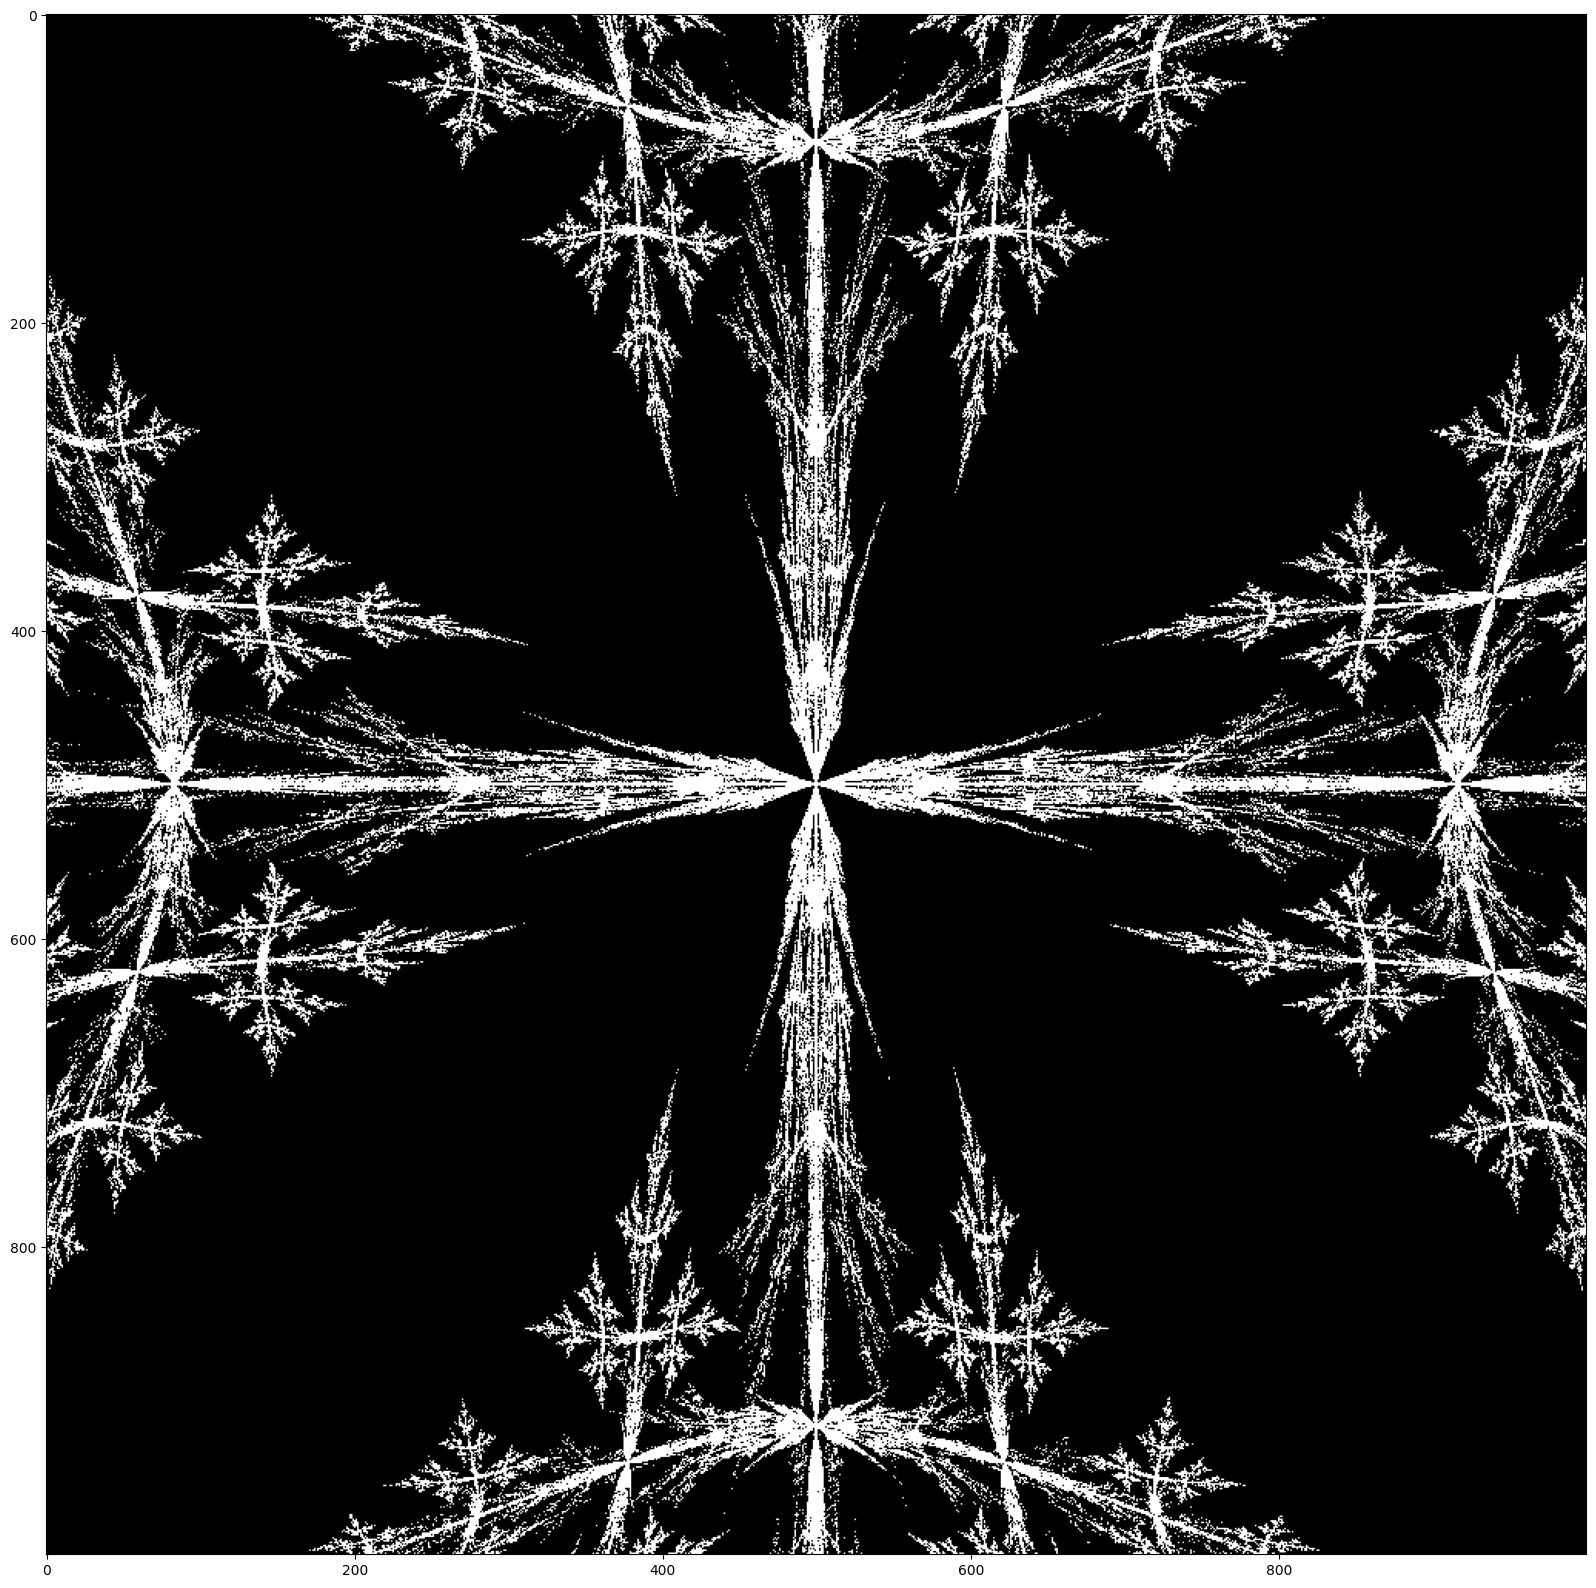

In [681]:
# Your code here
# Your code here
z = 0.0 + 0.*1j
max_iter = 1000000
size = 1000
pixels = np.zeros((size, size))
pi = 3.1415926535
r = 1
a = 0
funcs = [
    (lambda t: geometric_inverse(a, shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=pi), r)),
    (lambda t: geometric_inverse(a, shrink_rotate(t, 0. - 1.*1j, coef=0.5, angle=pi), r)),
    (lambda t: geometric_inverse(a, shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=pi), r)),
    (lambda t: geometric_inverse(a, shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=pi), r)),
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    x = int((z.real + 1) * size/2) 
    y = int((z.imag + 1) * size/2)
    if 0 <= x < size and 0 <= y < size:
        if n_iter >= 10: 
            pixels[y, x] = 1 

plt.figure(figsize=(20, 20))
plt.imshow(pixels, cmap='gray')
plt.show()


## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ – матрица размера $n\times n$, а $B$ – матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой из методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

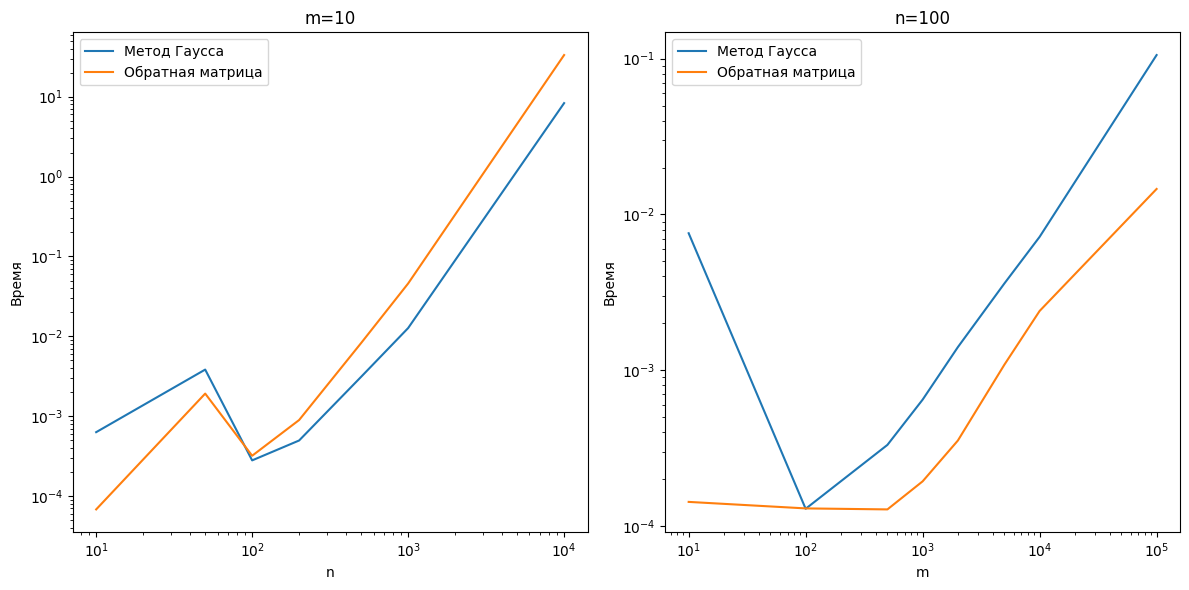

In [682]:
# Your code here
import time
def gauss_solve(A, B):
    return np.linalg.solve(A, B)

def inverse_solve(A, B):
    return np.dot(np.linalg.inv(A), B)

def experiments():
    m = 10
    N = [10, 50, 100, 200, 500, 1000, 10000]
    gauss_times_n = []
    inverse_times_n = []
    for n in N:
        A = np.random.rand(n, n)
        B = np.random.rand(n, m)
        
        # Метод Гаусса
        start = time.time()
        gauss_solve(A, B)
        gauss_times_n.append(time.time() - start)

        # Умножение на обратную матрицу
        start = time.time()
        inverse_solve(A, B)
        inverse_times_n.append(time.time() - start)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(N, gauss_times_n, label='Метод Гаусса')
    plt.plot(N, inverse_times_n, label='Обратная матрица')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('n')
    plt.ylabel('Время')
    plt.title('m=10')
    plt.legend()
    
    n = 100
    M = [10, 100, 500, 1000, 2000, 5000, 10000, 100000]
    gauss_times_m = []
    inverse_times_m = []
    for m in M:
        A = np.random.rand(n, n)
        B = np.random.rand(n, m)

        # Метод Гаусса
        start = time.time()
        gauss_solve(A, B)
        gauss_times_m.append(time.time() - start)

        # Умножение на обратную матрицу
        start = time.time()
        inverse_solve(A, B)
        inverse_times_m.append(time.time() - start)
    plt.subplot(1, 2, 2)
    plt.plot(M, gauss_times_m, label='Метод Гаусса')
    plt.plot(M, inverse_times_m, label='Обратная матрица')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('m')
    plt.ylabel('Время')
    plt.title('n=100')
    plt.legend()

    plt.tight_layout()
    plt.show()

experiments()

Если m фиксированное и небольшое, а n достаточно большое, то лучше метод решения с обратной матрицей. Если же n фиксированное и небольшое, а m достаточно большое, то лучше метод Гаусса. 

Количество операций в методе Гаусса: $O(n^3)$.
Количество операций при умножении на обратную матрицу: $O(n^3+n^2m)$.\
Если $m$ сильно больше $n$, то метод Гаусса становится более эффективным, иначе наоборот.